In [50]:
import pandas as pd
import scipy.stats
import numpy as np

In [51]:
#afrs = pd.read_csv("../full_variants/caqtls.african.lcls.benchmarking.all.tsv", sep="\t", header=0)
afrs = pd.read_csv("../full_variants/caqtls.african.lcls.benchmarking.all.addfilter.tsv", sep="\t", header=0)



In [52]:
afrs = afrs[afrs["var.isused"]]


In [53]:
afrs

,var.chr,var.pos_hg38,var.allele1,var.allele2,var.isused,obs.pval,obs.beta,obs.label,pred.enformer.encsr000emt.variantscore.global_sad,pred.enformer.encsr000emt.variantscore.global_sar,...,var.snp_id,var.region,var.snp,var.dbsnp_rsid,obs.distance,obs.se,obs.abs_beta,log10p,pos0,sigpeaks
4,chr1,905373,C,T,True,0.188152,0.130176,False,0.000071,0.000095,...,1_905373_T_C,1:904938:905544,1_905373_T_C,rs4970382,434,0.098145,0.130176,0.725491,905372,False
13,chr1,959193,G,A,True,0.570435,-0.048551,False,-0.000086,-0.000107,...,1_959193_G_A,1:958757:959472,1_959193_G_A,rs13303010,435,0.085245,0.048551,0.243794,959192,False
14,chr1,959339,C,T,True,0.401773,0.071807,False,0.000328,0.000412,...,1_959339_C_T,1:958757:959472,1_959339_C_T,rs187243360,581,0.085227,0.071807,0.396019,959338,False
16,chr1,960509,A,T,True,0.786217,-0.024701,False,0.000195,0.000245,...,1_960509_A_T,1:960449:961416,1_960509_A_T,rs72891151,59,0.090793,0.024701,0.104458,960508,False
17,chr1,960684,C,G,True,0.316227,0.077054,False,0.000174,0.000219,...,1_960684_C_G,1:960449:961416,1_960684_C_G,rs113034360,234,0.076444,0.077054,0.500001,960683,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219374,chr22,50621055,G,A,True,0.411079,0.094050,False,-0.000848,-0.001081,...,22_50621055_G_A,22:50620470:50621609,22_50621055_G_A,rs76733141,584,0.113873,0.094050,0.386075,50621054,False
219376,chr22,50621621,G,A,True,0.203090,0.131361,False,0.000067,0.000085,...,22_50621621_G_A,22:50621616:50621880,22_50621621_G_A,rs11912237,4,0.102438,0.131361,0.692311,50621620,False
219378,chr22,50628124,C,G,True,0.742636,0.021773,False,-0.000557,-0.000713,...,22_50628124_C_G,22:50627514:50628822,22_50628124_C_G,rs6151406,609,0.066098,0.021773,0.129224,50628123,False
219379,chr22,50628493,G,A,True,0.729436,0.028973,False,-0.000046,-0.000059,...,22_50628493_G_A,22:50627514:50628822,22_50628493_G_A,rs131715,978,0.083502,0.028973,0.137013,50628492,False


In [54]:
sum(afrs["obs.label"]==1)

6821

In [55]:
sum(afrs["obs.label"]==0)

69378

In [56]:
min(afrs[afrs["obs.label"]==0]["obs.pval"])

0.0100045

In [57]:
max(afrs[afrs["obs.label"]==0]["obs.pval"])

0.999996

In [58]:
max(afrs[afrs["obs.label"]==1]["obs.pval"])

9.94985e-06

In [59]:
min(afrs[afrs["obs.label"]==1]["obs.pval"])

2.92178e-41

In [60]:
sum(afrs["obs.label"]==1)+sum(afrs["obs.label"]==0)

76199

In [61]:
afrs.shape

(76199, 42)

In [62]:
sum(afrs["obs.label"]==1)/sum(afrs["obs.label"]==0)

0.09831646919772839

In [63]:
max(afrs[afrs["obs.label"]==1]["obs.pval"])

9.94985e-06

In [64]:
min(afrs[afrs["obs.label"]==1]["obs.pval"])

2.92178e-41

In [65]:
afrs.columns

Index(['var.chr', 'var.pos_hg38', 'var.allele1', 'var.allele2', 'var.isused',
       'obs.pval', 'obs.beta', 'obs.label',
       'pred.enformer.encsr000emt.variantscore.global_sad',
       'pred.enformer.encsr000emt.variantscore.global_sar',
       'pred.enformer.encsr000emt.variantscore.local_logfc',
       'pred.chrombpnet.gambian.variantscore.logfc',
       'pred.chrombpnet.gambian.variantscore.jsd',
       'pred.chrombpnet.esan.variantscore.logfc',
       'pred.chrombpnet.esan.variantscore.jsd',
       'pred.chrombpnet.mende.variantscore.logfc',
       'pred.chrombpnet.mende.variantscore.jsd',
       'pred.chrombpnet.yoruba.variantscore.logfc',
       'pred.chrombpnet.yoruba.variantscore.jsd',
       'pred.chrombpnet.maasai.variantscore.logfc',
       'pred.chrombpnet.maasai.variantscore.jsd',
       'pred.chrombpnet.luhya.variantscore.logfc',
       'pred.chrombpnet.luhya.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.logfc',
       'pred.chrombpnet.encsr637xs

# AUPRC (benchmarking)

Text(0, 0.5, 'Precision')

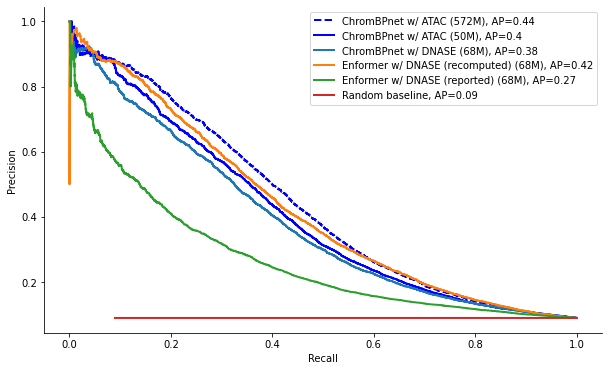

In [66]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve


fig, ax = plt.subplots(figsize=(10,6))

######################################

keyd="pred.chrombpnet.encsr637xsc.variantscore.ips"

label=afrs["obs.label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ ATAC (572M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr637xsc_50m.variantscore.ips"
label=afrs["obs.label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ ATAC (50M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.chrombpnet.encsr000emt.variantscore.ips"
label=afrs["obs.label"].astype(int)
score=abs(afrs[keyd])

title="ChromBPnet w/ DNASE (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################



keyd="pred.enformer.encsr000emt.variantscore.local_logfc"
label=afrs["obs.label"].astype(int)
score=abs(afrs[keyd])
title="Enformer w/ DNASE (recomputed) (68M)"

fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

# keyd="enformer.encsr000emt.variantscore.sad"
# label=afrs["label"].astype(int)
# score=abs(afrs[keyd])
# title="Enformer w/ DNASE SAD (50M)"

# fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
# roc_auc = metrics.average_precision_score(label, score)
# ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))

######################################

keyd="pred.enformer.encsr000emt.variantscore.global_sar"
label=afrs["obs.label"].astype(int)
score=abs(afrs[keyd])
title="Enformer w/ DNASE (reported) (68M)"


fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(label,score)
roc_auc = metrics.average_precision_score(label, score)
ax.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, label=title+", AP="+str(round(roc_auc,2)))
enformer_auc = roc_auc

######################################

roc_auc=sum(afrs["obs.label"]==1)/len(afrs["obs.label"])
ax.plot(fpr_chrombpnet, [sum(afrs["obs.label"]==1)/len(afrs["obs.label"])]*len(fpr_chrombpnet), linewidth=2, label="Random baseline, AP="+str(round(roc_auc,2)))


ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc='upper right')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

#plt.savefig("subfigs/afr_caqtls_auprc.pdf", transparent=True, dpi=300)

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import random
import os
import argparse
from sklearn.metrics import precision_recall_curve

random_bc = []
chrombpnet = {}
enformer_dnase_roc = []
enformer_dnase_roc_sar = []

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(5,25,3):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf1 = afrs[afrs["obs.pval"]<threshold]
    dataf1["obs.label"] = 1
    dataf1 = dataf1[["pred.chrombpnet.encsr000emt.variantscore.ips", 
                    "pred.chrombpnet.encsr637xsc.variantscore.ips",
                     "pred.chrombpnet.encsr637xsc_50m.variantscore.ips",
                    "pred.enformer.encsr000emt.variantscore.global_sar",  "pred.enformer.encsr000emt.variantscore.local_logfc", "obs.label"]]
    
    dataf2 = afrs[afrs["obs.label"]==0]
    dataf2 = dataf2[["pred.chrombpnet.encsr000emt.variantscore.ips", 
                    "pred.chrombpnet.encsr637xsc.variantscore.ips",
                     "pred.chrombpnet.encsr637xsc_50m.variantscore.ips",
                    "pred.enformer.encsr000emt.variantscore.global_sar",  "pred.enformer.encsr000emt.variantscore.local_logfc", "obs.label"]]

    
    dataf = pd.concat([dataf1, dataf2])
    
    total = dataf.shape[0]
    sigs = sum(dataf["obs.label"])
    print("sig",sigs)
    print(total)
    print(np.round(sigs/total,3))
    
    random_bc.append(np.round(sigs/total,3))
    
    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.chrombpnet.encsr000emt.variantscore.ips"]))
    chrombpnet["ChromBPNet DNase (68M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.chrombpnet.encsr637xsc.variantscore.ips"]))
    chrombpnet["ChromBPNet ATAC (572M)"].append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.chrombpnet.encsr637xsc_50m.variantscore.ips"]))
    chrombpnet["ChromBPNet ATAC (50M)"].append(roc_auc)
    
    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.enformer.encsr000emt.variantscore.local_logfc"]))
    enformer_dnase_roc.append(roc_auc)

    roc_auc = metrics.average_precision_score(dataf["obs.label"], abs(dataf["pred.enformer.encsr000emt.variantscore.global_sar"]))
    enformer_dnase_roc_sar.append(roc_auc)


1e-05
sig 6821
76199
0.09


/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1e-08
sig 3705
73083
0.051
1e-11
sig 2258
71636
0.032
1e-14
sig 1471
70849
0.021
1e-17
sig 931
70309
0.013
1.2876178137472069e-19
sig 666
70044
0.01
4.990607165261474e-18
sig 884
70262
0.013


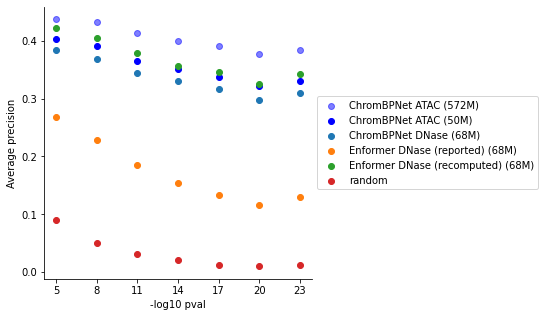

In [68]:

fig, ax = plt.subplots(figsize=(6,5))
colors = ["blue", "blue"]
alphas = [0.5, 1.0]
idx=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)"]:
    ax.scatter(np.arange(5,25,3).astype(str), chrombpnet[key], label=key, c="blue", alpha=alphas[idx])
    idx+=1
    
key="ChromBPNet DNase (68M)"
ax.scatter(np.arange(5,25,3).astype(str), chrombpnet[key], label=key)
ax.scatter(np.arange(5,25,3).astype(str), enformer_dnase_roc_sar, label="Enformer DNase (reported) (68M)")
ax.scatter(np.arange(5,25,3).astype(str), enformer_dnase_roc, label="Enformer DNase (recomputed) (68M)")

ax.scatter(np.arange(5,25,3).astype(str), random_bc, label="random")

ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10 pval")
ax.set_ylabel("Average precision")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#plt.savefig("subfigs/afr_caqtls_auprc_compare.pdf", transparent=True, dpi=300)

# Pearsonr (benchmarking)

In [20]:
dataf = afrs
pearsonrs = []

keyd='pred.chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))

keyd='pred.enformer.encsr000emt.variantscore.local_logfc'
print("Enformer: ",np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))

keyd='pred.enformer.encsr000emt.variantscore.global_sar'
print("Enformer: ",np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[1])
keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[1])
keyd='pred.chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase: ", scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[1])
keyd='pred.enformer.encsr000emt.variantscore.local_logfc'
print("Enformer: ", scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[1])
keyd='pred.enformer.encsr000emt.variantscore.global_sar'
print("Enformer: ", scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[1])



ChromBPNet ATAC:  0.69
ChromBPNet ATAC (50M):  0.67
ChromBPNet DNase:  0.67
Enformer:  0.64
Enformer:  0.49
ChromBPNet ATAC:  0.0
ChromBPNet ATAC:  0.0
ChromBPNet DNase:  0.0
Enformer:  0.0
Enformer:  0.0


In [21]:
pearsonr_abs = []
keyd='pred.chrombpnet.encsr637xsc.variantscore.logfc'
print("pred.chrombpnet ATAC: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("pred.chrombpnet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr000emt.variantscore.logfc'
print("pred.chrombpnet DNase: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))

keyd='pred.enformer.encsr000emt.variantscore.local_logfc'
print("Enformer: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))

keyd='pred.enformer.encsr000emt.variantscore.global_sar'
print("Enformer: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))


keyd='pred.chrombpnet.encsr637xsc.variantscore.logfc'
print("pred.chrombpnet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[1])
keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("pred.chrombpnet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[1])
keyd='pred.chrombpnet.encsr000emt.variantscore.logfc'
print("pred.chrombpnet DNase: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[1])
keyd='pred.enformer.encsr000emt.variantscore.local_logfc'
print("Enformer SAD: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[1])
keyd='pred.enformer.encsr000emt.variantscore.global_sar'
print("Enformer SAR: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[1])


pred.chrombpnet ATAC:  0.38
pred.chrombpnet ATAC (50M):  0.37
pred.chrombpnet DNase:  0.38
Enformer:  0.29
Enformer:  0.11
pred.chrombpnet ATAC:  1.9237148658787595e-238
pred.chrombpnet ATAC:  2.301462737345662e-220
pred.chrombpnet DNase:  8.332655777196384e-227
Enformer SAD:  6.14486789362037e-130
Enformer SAR:  2.3616044014841508e-18


In [22]:
df= pd.DataFrame()

df["pearsonr"] = pearsonrs + pearsonr_abs
df["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"] + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"]
df["scoring"] = ["signed"]*len(pearsonrs) + ["unsigned"]*len(pearsonr_abs)
df["score"] = ["logfc"] * df.shape[0]
df["pearsonr"] = df["pearsonr"].astype(float)
df

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,logfc
1,0.67,ChromBPNet ATAC (50M),signed,logfc
2,0.67,ChromBPNet DNase (68M),signed,logfc
3,0.64,Enformer (recomputed) DNase (68M),signed,logfc
4,0.49,Enformer (reported) DNase (68M),signed,logfc
5,0.38,ChromBPNet ATAC (500M),unsigned,logfc
6,0.37,ChromBPNet ATAC (50M),unsigned,logfc
7,0.38,ChromBPNet DNase (68M),unsigned,logfc
8,0.29,Enformer (recomputed) DNase (68M),unsigned,logfc
9,0.11,Enformer (reported) DNase (68M),unsigned,logfc


In [23]:
dataf = afrs
pearsonrs = []
keyd='pred.chrombpnet.encsr637xsc.variantscore.jsd'
print("pred.chrombpnet ATAC: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("pred.chrombpnet ATAC (50M): ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr000emt.variantscore.jsd'
print("pred.chrombpnet DNase: ", np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr637xsc.variantscore.jsd'
print("pred.chrombpnet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[1])
keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("pred.chrombpnet ATAC: ", scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[1])
keyd='pred.chrombpnet.encsr000emt.variantscore.jsd'
print("pred.chrombpnet DNase: ", scipy.stats.pearsonr(dataf[keyd][dataf["obs.label"]==1], dataf["obs.beta"][dataf["obs.label"]==1])[1])



pred.chrombpnet ATAC:  0.66
pred.chrombpnet ATAC (50M):  0.65
pred.chrombpnet DNase:  0.67
pred.chrombpnet ATAC:  0.0
pred.chrombpnet ATAC:  0.0
pred.chrombpnet DNase:  0.0


In [24]:
pearsonr_abs = []
keyd='pred.chrombpnet.encsr637xsc.variantscore.jsd'
print("pred.chrombpnet ATAC: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("pred.chrombpnet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))

keyd='pred.chrombpnet.encsr000emt.variantscore.jsd'
print("pred.chrombpnet DNase: ", np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))
pearsonr_abs.append(np.round(scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[0],2))


keyd='pred.chrombpnet.encsr637xsc.variantscore.jsd'
print("pred.chrombpnet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[1])
keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("pred.chrombpnet ATAC: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[1])
keyd='pred.chrombpnet.encsr000emt.variantscore.jsd'
print("pred.chrombpnet DNase: ", scipy.stats.pearsonr(abs(dataf[keyd])[dataf["obs.label"]==1], abs(dataf["obs.beta"])[dataf["obs.label"]==1])[1])


pred.chrombpnet ATAC:  0.34
pred.chrombpnet ATAC (50M):  0.32
pred.chrombpnet DNase:  0.34
pred.chrombpnet ATAC:  1.2898078859520728e-179
pred.chrombpnet ATAC:  1.8304213920818472e-167
pred.chrombpnet DNase:  8.492320480992387e-188


In [25]:
df1= pd.DataFrame()

df1["pearsonr"] = pearsonrs + pearsonr_abs
df1["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"] + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]
df1["scoring"] = ["signed"]*len(pearsonrs) + ["unsigned"]*len(pearsonr_abs)
df1["score"] = ["jsd"] * df1.shape[0]
df1["pearsonr"] = df["pearsonr"].astype(float)
df1

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,jsd
1,0.67,ChromBPNet ATAC (50M),signed,jsd
2,0.67,ChromBPNet DNase (68M),signed,jsd
3,0.64,ChromBPNet ATAC (500M),unsigned,jsd
4,0.49,ChromBPNet ATAC (50M),unsigned,jsd
5,0.38,ChromBPNet DNase (68M),unsigned,jsd


In [26]:
df = pd.concat((df, df1))

In [27]:
df

,pearsonr,method,scoring,score
0,0.69,ChromBPNet ATAC (500M),signed,logfc
1,0.67,ChromBPNet ATAC (50M),signed,logfc
2,0.67,ChromBPNet DNase (68M),signed,logfc
3,0.64,Enformer (recomputed) DNase (68M),signed,logfc
4,0.49,Enformer (reported) DNase (68M),signed,logfc
5,0.38,ChromBPNet ATAC (500M),unsigned,logfc
6,0.37,ChromBPNet ATAC (50M),unsigned,logfc
7,0.38,ChromBPNet DNase (68M),unsigned,logfc
8,0.29,Enformer (recomputed) DNase (68M),unsigned,logfc
9,0.11,Enformer (reported) DNase (68M),unsigned,logfc


0    0.69
1    0.67
2    0.67
3    0.64
4    0.49
5    0.38
6    0.37
7    0.38
8    0.29
9    0.11
0    0.69
1    0.67
2    0.67
3    0.64
4    0.49
5    0.38
Name: pearsonr, dtype: float64
{'Enformer (reported) DNase (68M)', 'ChromBPNet DNase (68M)', 'ChromBPNet ATAC (50M)', 'Enformer (recomputed) DNase (68M)', 'ChromBPNet ATAC (500M)'}


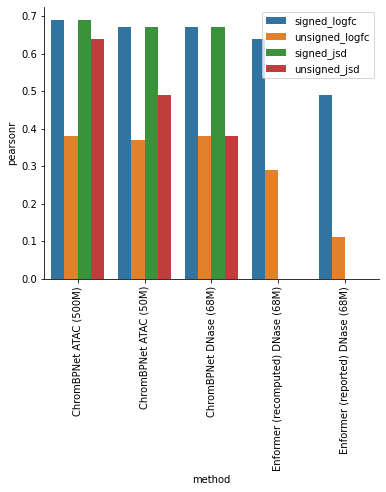

In [28]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(6,5))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
df["scoring-methods"] = df["scoring"] + "_" +  df["score"]
ax = sns.barplot(data=df, x="method", y="pearsonr", hue="scoring-methods")
print(set(df["method"]))
xtix = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)", "Enformer (recomputed) DNase (68M)", "Enformer (reported) DNase (68M)"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)

ax.legend(loc="upper right")

(0.6890790662856323, 0.0)


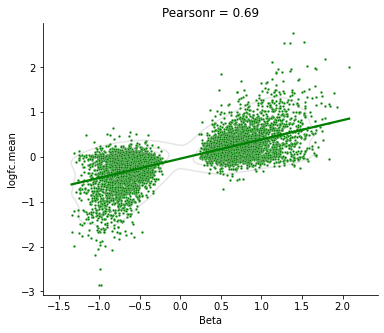

In [29]:

   
data = pd.DataFrame()
data["logfc.mean"] = afrs[afrs["obs.label"]==1]["pred.chrombpnet.encsr637xsc.variantscore.logfc"]
data["Beta"] = afrs[afrs["obs.label"]==1]["obs.beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="green", rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="green")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


plt.savefig("subfigs/afr_caqtls_pearsonr.pdf", transparent=True, dpi=300)

(0.47734449042430943, 0.0)


Text(0.5, 1.0, 'Pearsonr = 0.48')

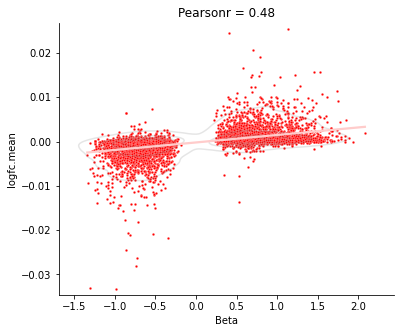

In [30]:

   
data = pd.DataFrame()
data["logfc.mean"] = dataf[dataf["obs.label"]==1]["pred.enformer.encsr000emt.variantscore.global_sad"]
data["Beta"] = dataf[dataf["obs.label"]==1]["obs.beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="Red")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#ffcccb")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))



In [31]:
import scipy.stats



chrombpnet = {}
chrombpnet_unsigned = {}
enformer = []
enformer_unsigned = []
enformer_sar = []
enformer_unsigned_sar = []
chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(5,25,3):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf = afrs[afrs["obs.pval"]<threshold]

      
    pear = scipy.stats.pearsonr(dataf["pred.chrombpnet.encsr000emt.variantscore.logfc"], dataf["obs.beta"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["pred.chrombpnet.encsr000emt.variantscore.logfc"]), abs(dataf["obs.beta"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["pred.chrombpnet.encsr637xsc.variantscore.logfc"], dataf["obs.beta"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["pred.chrombpnet.encsr637xsc.variantscore.logfc"]), abs(dataf["obs.beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["pred.chrombpnet.encsr637xsc_50m.variantscore.logfc"], dataf["obs.beta"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["pred.chrombpnet.encsr637xsc_50m.variantscore.logfc"]), abs(dataf["obs.beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(dataf["pred.enformer.encsr000emt.variantscore.local_logfc"], dataf["obs.beta"])
    enformer.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["pred.enformer.encsr000emt.variantscore.local_logfc"]), abs(dataf["obs.beta"]))
    enformer_unsigned.append(pear[0])

    pear = scipy.stats.pearsonr(dataf["pred.enformer.encsr000emt.variantscore.global_sar"], dataf["obs.beta"])
    enformer_sar.append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["pred.enformer.encsr000emt.variantscore.global_sar"]), abs(dataf["obs.beta"]))
    enformer_unsigned_sar.append(pear[0])


1e-05
1e-08
1e-11
1e-14
1e-17
1.2876178137472069e-19
4.990607165261474e-18


[0.6890790662856323, 0.7186620478626515, 0.7280528332770801, 0.7370970737031548, 0.741261937678402, 0.7457494850173944, 0.74177315271763]
[0.6661928475788993, 0.6942004936760362, 0.7053944546161575, 0.7123873901186685, 0.7188153733107953, 0.7214209576225057, 0.7182996044560357]
[0.6739142826305614, 0.7032557359064998, 0.716359970005568, 0.7275926576645827, 0.7360970233060148, 0.7405307477138142, 0.7373824451393095]


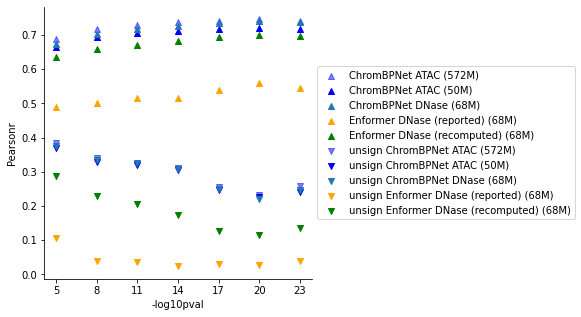

In [32]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(5,25,3).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1
    print(chrombpnet[key])


ax.scatter(np.arange(5,25,3).astype(str), enformer_sar ,  marker="^", label="Enformer DNase (reported) (68M)", color="orange")
ax.scatter(np.arange(5,25,3).astype(str), enformer ,  marker="^", label="Enformer DNase (recomputed) (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(5,25,3).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(5,25,3).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase (reported) (68M)", color="orange")
ax.scatter(np.arange(5,25,3).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase (recomputed) (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10pval")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

plt.savefig("subfigs/afr_caqtls_pearsonr_compare.pdf", transparent=True, dpi=300)


In [33]:
import scipy.stats



chrombpnet = {}
chrombpnet_unsigned = {}

chrombpnet["ChromBPNet DNase (68M)"] = []
chrombpnet["ChromBPNet ATAC (572M)"] = []
chrombpnet["ChromBPNet ATAC (50M)"] = []

chrombpnet_unsigned["ChromBPNet DNase (68M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (572M)"] = []
chrombpnet_unsigned["ChromBPNet ATAC (50M)"] = []

for threshold in np.arange(5,25,3):
    threshold = 1 / (10**(threshold))
    print(threshold)
    dataf = afrs[afrs["obs.pval"]<threshold]

      
    pear = scipy.stats.pearsonr(dataf["pred.chrombpnet.encsr000emt.variantscore.jsd"], dataf["obs.beta"])
    chrombpnet["ChromBPNet DNase (68M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["pred.chrombpnet.encsr000emt.variantscore.jsd"]), abs(dataf["obs.beta"]))
    chrombpnet_unsigned["ChromBPNet DNase (68M)"].append(pear[0])    
 
    pear = scipy.stats.pearsonr(dataf["pred.chrombpnet.encsr637xsc.variantscore.jsd"], dataf["obs.beta"])
    chrombpnet["ChromBPNet ATAC (572M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["pred.chrombpnet.encsr637xsc.variantscore.jsd"]), abs(dataf["obs.beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (572M)"].append(pear[0])    

    pear = scipy.stats.pearsonr(dataf["pred.chrombpnet.encsr637xsc_50m.variantscore.jsd"], dataf["obs.beta"])
    chrombpnet["ChromBPNet ATAC (50M)"].append(pear[0])
    
    pear = scipy.stats.pearsonr(abs(dataf["pred.chrombpnet.encsr637xsc_50m.variantscore.jsd"]), abs(dataf["obs.beta"]))
    chrombpnet_unsigned["ChromBPNet ATAC (50M)"].append(pear[0])
    


1e-05
1e-08
1e-11
1e-14
1e-17
1.2876178137472069e-19
4.990607165261474e-18


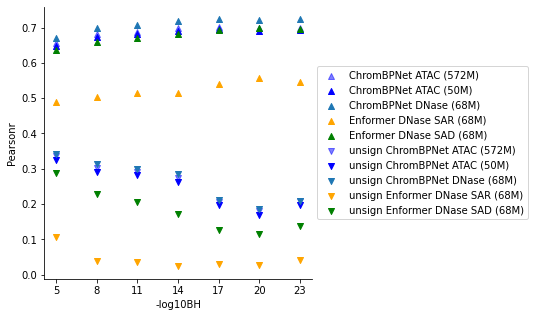

In [34]:
fig, ax = plt.subplots(figsize=(6,5))

colors = ["blue", "blue", "C0"]
alphas= [0.5, 1.0, 1.0, 1.0] 


i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(5,25,3).astype(str), chrombpnet[key], marker="^", label=key, color=colors[i], alpha=alphas[i])
    i+=1


ax.scatter(np.arange(5,25,3).astype(str), enformer_sar ,  marker="^", label="Enformer DNase SAR (68M)", color="orange")
ax.scatter(np.arange(5,25,3).astype(str), enformer ,  marker="^", label="Enformer DNase SAD (68M)", color="green")

i=0
for key in ["ChromBPNet ATAC (572M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]:
    ax.scatter(np.arange(5,25,3).astype(str), chrombpnet_unsigned[key], marker="v", label="unsign "+key, color=colors[i], alpha=alphas[i])
    i+=1
    
ax.scatter(np.arange(5,25,3).astype(str), enformer_unsigned_sar, marker="v", label="unsign " +"Enformer DNase SAR (68M)", color="orange")
ax.scatter(np.arange(5,25,3).astype(str), enformer_unsigned, marker="v", label="unsign " +"Enformer DNase SAD (68M)", color="green")


ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("-log10BH")
ax.set_ylabel("Pearsonr")
#plt.legend(loc='upper right')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.show()

plt.savefig("subfigs/afr_caqtls_pearsonr_compare_jsd.pdf", transparent=True, dpi=300)


# Pearsonr (across-ancestry)

In [35]:
dataf = afrs[afrs["obs.label"]==1]
dataf.columns
 

Index(['var.chr', 'var.pos_hg38', 'var.allele1', 'var.allele2', 'var.isused',
       'obs.pval', 'obs.beta', 'obs.label',
       'pred.enformer.encsr000emt.variantscore.global_sad',
       'pred.enformer.encsr000emt.variantscore.global_sar',
       'pred.enformer.encsr000emt.variantscore.local_logfc',
       'pred.chrombpnet.gambian.variantscore.logfc',
       'pred.chrombpnet.gambian.variantscore.jsd',
       'pred.chrombpnet.esan.variantscore.logfc',
       'pred.chrombpnet.esan.variantscore.jsd',
       'pred.chrombpnet.mende.variantscore.logfc',
       'pred.chrombpnet.mende.variantscore.jsd',
       'pred.chrombpnet.yoruba.variantscore.logfc',
       'pred.chrombpnet.yoruba.variantscore.jsd',
       'pred.chrombpnet.maasai.variantscore.logfc',
       'pred.chrombpnet.maasai.variantscore.jsd',
       'pred.chrombpnet.luhya.variantscore.logfc',
       'pred.chrombpnet.luhya.variantscore.jsd',
       'pred.chrombpnet.encsr637xsc.variantscore.logfc',
       'pred.chrombpnet.encsr637xs

In [36]:
anscs = dataf.columns[8:-7].tolist()
anscs = [ans.split(".")[2] for ans in anscs]
anscs = set(anscs)
print(anscs)

{'esan', 'maasai', 'luhya', 'mende', 'encsr000emt', 'gambian', 'encsr637xsc', 'yoruba', 'encsr637xsc_50m'}


In [37]:

ancestries = []

for ans in anscs:
    if ans=="eur":
        continue
    if ans=="afr":
        continue
    if ans == "GM12878":
        for title in ["encsr637xsc", "encsr000emt", "encsr637xsc_50m", "encsr000emt.ENCSR095QNB" ]:
            ancestries.append(ans+title)
    else:
        ancestries.append(ans)
    
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        #print("chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", ancestry))

        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(dataf["pred.chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", outer_ancestry)],
                                                 dataf["pred.chrombpnet.encsr637xsc.variantscore.logfc".replace("encsr637xsc", ancestry)])[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df    


,esan,maasai,luhya,mende,encsr000emt,gambian,encsr637xsc,yoruba,encsr637xsc_50m
ancestry,,,,,,,,,
esan,1.000000,0.962263,0.968694,0.969274,0.946377,0.965947,0.949222,0.970391,0.933263
maasai,0.962263,1.000000,0.969852,0.966399,0.949218,0.968558,0.945141,0.965378,0.932725
luhya,0.968694,0.969852,1.000000,0.970221,0.946781,0.970754,0.951332,0.971127,0.937562
mende,0.969274,0.966399,0.970221,1.000000,0.951419,0.972994,0.954689,0.969313,0.940641
encsr000emt,0.946377,0.949218,0.946781,0.951419,1.000000,0.952567,0.952442,0.942244,0.958078
gambian,0.965947,0.968558,0.970754,0.972994,0.952567,1.000000,0.955396,0.968849,0.937518
encsr637xsc,0.949222,0.945141,0.951332,0.954689,0.952442,0.955396,1.000000,0.950215,0.966674
yoruba,0.970391,0.965378,0.971127,0.969313,0.942244,0.968849,0.950215,1.000000,0.930541
encsr637xsc_50m,0.933263,0.932725,0.937562,0.940641,0.958078,0.937518,0.966674,0.930541,1.000000


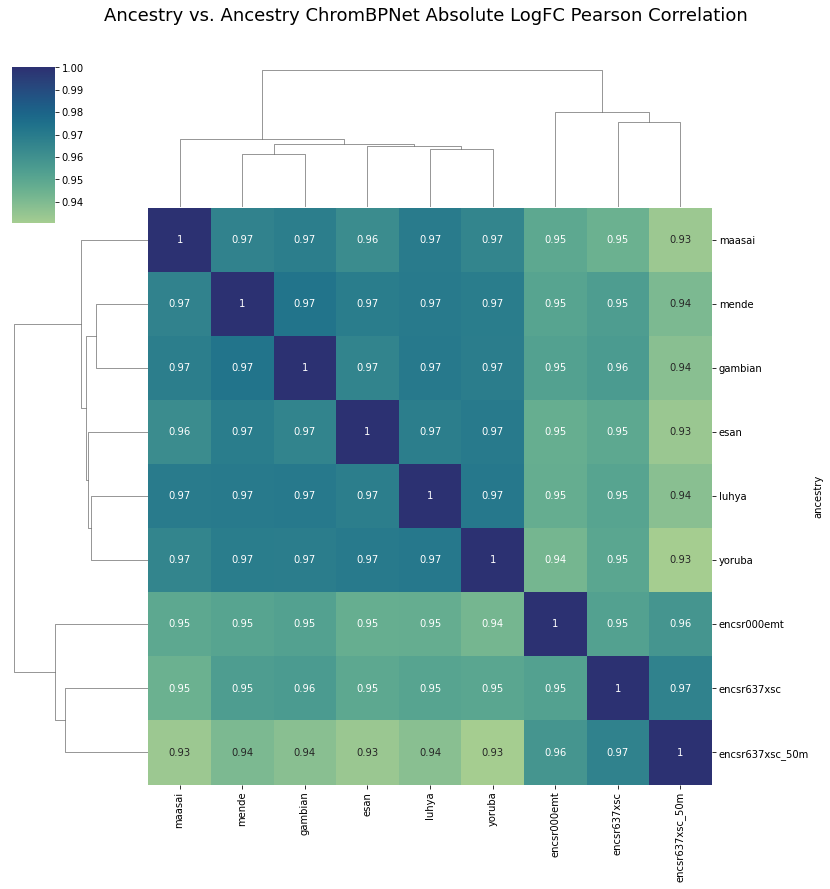

In [38]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Absolute LogFC Pearson Correlation', fontsize=18, y=1.05)

plt.savefig("subfigs/afr_caqtls_ancestry_logfc.pdf", transparent=True, dpi=300)


In [39]:

ancestries = []

for ans in anscs:
    if ans=="eur":
        continue
    if ans=="afr":
        continue
    if ans == "GM12878":
        for title in ["encsr637xsc", "encsr000emt", "encsr637xsc_50m", "encsr000emt.ENCSR095QNB" ]:
            ancestries.append(ans+title)
    else:
        ancestries.append(ans)
    
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    print(outer_ancestry)
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(dataf["pred.chrombpnet.encsr637xsc.variantscore.jsd".replace("encsr637xsc", outer_ancestry)],
                                                 dataf["pred.chrombpnet.encsr637xsc.variantscore.jsd".replace("encsr637xsc", ancestry)])[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df    


esan
maasai
luhya
mende
encsr000emt
gambian
encsr637xsc
yoruba
encsr637xsc_50m


,esan,maasai,luhya,mende,encsr000emt,gambian,encsr637xsc,yoruba,encsr637xsc_50m
ancestry,,,,,,,,,
esan,1.000000,0.956425,0.959880,0.960310,0.925213,0.959536,0.942951,0.959904,0.942342
maasai,0.956425,1.000000,0.965161,0.962114,0.930552,0.966729,0.946332,0.960549,0.946120
luhya,0.959880,0.965161,1.000000,0.964418,0.927706,0.966670,0.949003,0.966468,0.946609
mende,0.960310,0.962114,0.964418,1.000000,0.934932,0.968579,0.947882,0.964233,0.946444
encsr000emt,0.925213,0.930552,0.927706,0.934932,1.000000,0.936946,0.934576,0.931731,0.940605
gambian,0.959536,0.966729,0.966670,0.968579,0.936946,1.000000,0.950995,0.964048,0.950118
encsr637xsc,0.942951,0.946332,0.949003,0.947882,0.934576,0.950995,1.000000,0.950976,0.970139
yoruba,0.959904,0.960549,0.966468,0.964233,0.931731,0.964048,0.950976,1.000000,0.946716
encsr637xsc_50m,0.942342,0.946120,0.946609,0.946444,0.940605,0.950118,0.970139,0.946716,1.000000


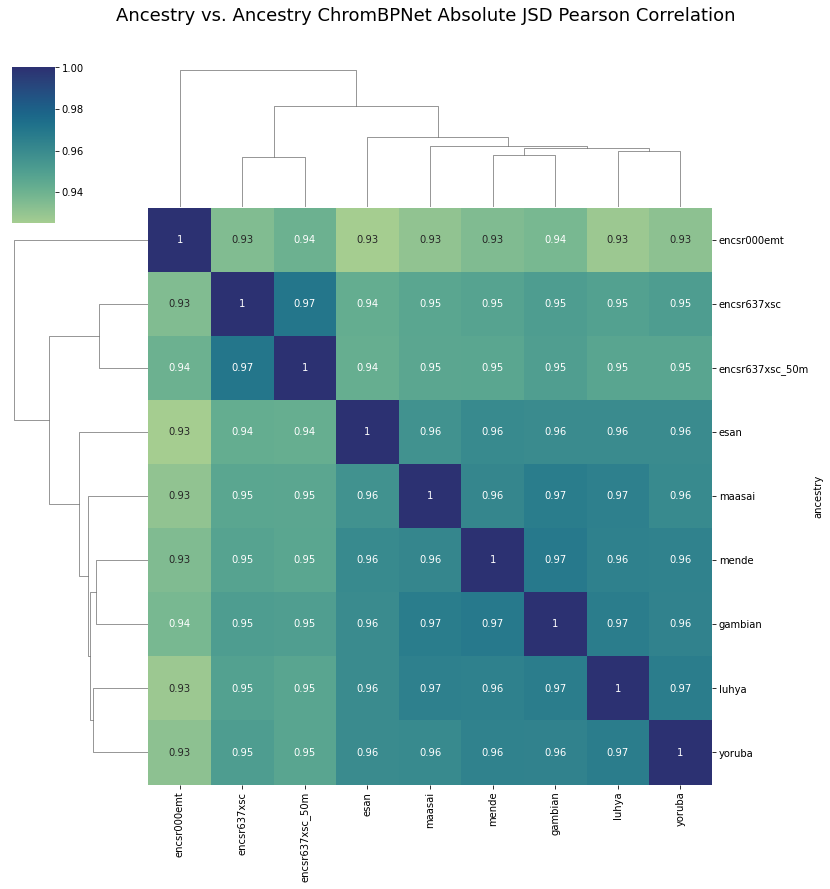

In [40]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Absolute JSD Pearson Correlation', fontsize=18, y=1.05)
plt.savefig("subfigs/afr_caqtls_ancestry_jsd.pdf", transparent=True, dpi=300)


In [41]:
dataf.shape

(6821, 39)

# Pearsonr (ASB)

In [42]:
asb_scores = pd.read_csv("../full_variants/caqtls.african.lcls.asb.benchmarking.all.tsv", sep="\t", header=0)

In [43]:
asb_scores = asb_scores[asb_scores["var.isused"]]

In [44]:
asb_scores.head()

,var.chr,var.pos_hg38,allele1,allele2,var.isused,var.snp_id,obs.meanLog2FC,pred.chrombpnet.encsr637xsc.variantscore.logfc,pred.chrombpnet.encsr637xsc.variantscore.jsd,pred.chrombpnet.encsr000emt.variantscore.logfc,pred.chrombpnet.encsr000emt.variantscore.jsd,pred.chrombpnet.encsr637xsc_50m.variantscore.logfc,pred.chrombpnet.encsr637xsc_50m.variantscore.jsd
0,chr1,976215,A,G,True,1_976215_A_G,-1.852605,-0.079329,-0.061612,0.082073,0.026010,0.075894,0.038511
1,chr1,1000079,A,G,True,1_1000079_A_G,-2.087074,-0.002563,-0.013885,-0.016055,-0.014341,0.005725,0.013705
2,chr1,1038800,T,G,True,1_1038800_G_T,-3.172063,0.000583,0.013765,-0.027916,-0.015095,-0.035529,-0.016815
3,chr1,1038819,T,C,True,1_1038819_C_T,-2.390945,0.223319,0.023942,0.034382,0.015420,0.109847,0.020354
4,chr1,1038845,G,A,True,1_1038845_A_G,-2.163432,-0.441510,-0.035797,-0.276909,-0.046153,-0.377451,-0.036387


In [45]:
pearsonrs = []
keyd='pred.chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))

keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))

keyd='pred.chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))


keyd='pred.chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[1])
keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[1])
keyd='pred.chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[1])


keyd='pred.chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))

keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))

keyd='pred.chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))
pearsonrs.append(np.round(scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[0],2))


keyd='pred.chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[1])
keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[1])
keyd='pred.chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(asb_scores[keyd], asb_scores["obs.meanLog2FC"])[1])


ChromBPNet ATAC:  0.68
ChromBPNet ATAC (50M):  0.66
ChromBPNet DNase (68M):  0.67
ChromBPNet ATAC:  0.0
ChromBPNet ATAC (50M):  0.0
ChromBPNet DNase (68M):  0.0
ChromBPNet ATAC:  0.66
ChromBPNet ATAC (50M):  0.65
ChromBPNet DNase (68M):  0.68
ChromBPNet ATAC:  0.0
ChromBPNet ATAC (50M):  0.0
ChromBPNet DNase (68M):  0.0


In [46]:
pearsonrs_abs = []
keyd='pred.chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))

keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))

keyd='pred.chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))


keyd='pred.chrombpnet.encsr637xsc.variantscore.logfc'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[1])
keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.logfc'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[1])
keyd='pred.chrombpnet.encsr000emt.variantscore.logfc'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[1])


keyd='pred.chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))

keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC (50M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))

keyd='pred.chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase (68M): ", np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))
pearsonrs_abs.append(np.round(scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[0],2))


keyd='pred.chrombpnet.encsr637xsc.variantscore.jsd'
print("ChromBPNet ATAC: ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[1])
keyd='pred.chrombpnet.encsr637xsc_50m.variantscore.jsd'
print("ChromBPNet ATAC (50M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[1])
keyd='pred.chrombpnet.encsr000emt.variantscore.jsd'
print("ChromBPNet DNase (68M): ", scipy.stats.pearsonr(abs(asb_scores[keyd]), abs(asb_scores["obs.meanLog2FC"]))[1])


ChromBPNet ATAC:  0.28
ChromBPNet ATAC (50M):  0.29
ChromBPNet DNase (68M):  0.28
ChromBPNet ATAC:  5.7866218766536666e-92
ChromBPNet ATAC (50M):  2.213927803434823e-98
ChromBPNet DNase (68M):  1.4247425840463037e-91
ChromBPNet ATAC:  0.27
ChromBPNet ATAC (50M):  0.26
ChromBPNet DNase (68M):  0.28
ChromBPNet ATAC:  9.112300639820485e-85
ChromBPNet ATAC (50M):  2.2617814311586563e-79
ChromBPNet DNase (68M):  4.8449002235115514e-92


In [47]:
df= pd.DataFrame()

df["pearsonr"] = pearsonrs + pearsonrs_abs
df["method"] = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]*2 + ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]*2
df["scoring"] = ["signed-logfc"]*3 + ["signed-jsd"]*3 + ["unsigned-logc"]*3 + ["unsigned-jsd"]*3

df["pearsonr"] = df["pearsonr"].astype(float)
df

,pearsonr,method,scoring
0,0.68,ChromBPNet ATAC (500M),signed-logfc
1,0.66,ChromBPNet ATAC (50M),signed-logfc
2,0.67,ChromBPNet DNase (68M),signed-logfc
3,0.66,ChromBPNet ATAC (500M),signed-jsd
4,0.65,ChromBPNet ATAC (50M),signed-jsd
5,0.68,ChromBPNet DNase (68M),signed-jsd
6,0.28,ChromBPNet ATAC (500M),unsigned-logc
7,0.29,ChromBPNet ATAC (50M),unsigned-logc
8,0.28,ChromBPNet DNase (68M),unsigned-logc
9,0.27,ChromBPNet ATAC (500M),unsigned-jsd


0     0.68
1     0.66
2     0.67
3     0.66
4     0.65
5     0.68
6     0.28
7     0.29
8     0.28
9     0.27
10    0.26
11    0.28
Name: pearsonr, dtype: float64


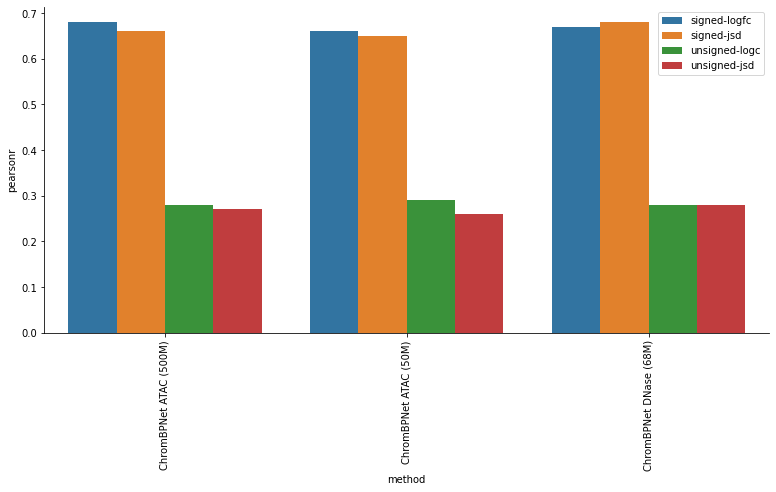

In [48]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(13,6))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
ax = sns.barplot(data=df, x="method", y="pearsonr", hue="scoring")
xtix = ["ChromBPNet ATAC (500M)", "ChromBPNet ATAC (50M)", "ChromBPNet DNase (68M)"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc="upper right")
plt.savefig("subfigs/afr_caqtls_asb_pearsonr.pdf", transparent=True, dpi=300)

(0.6832923895386526, 0.0)


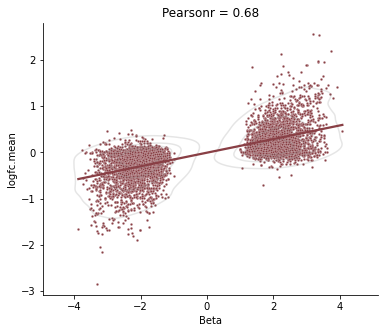

In [49]:

   
data = pd.DataFrame()
data["logfc.mean"] = asb_scores['pred.chrombpnet.encsr637xsc.variantscore.logfc']
data["Beta"] = asb_scores["obs.meanLog2FC"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=6, color="#893f45", rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#893f45")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))


plt.savefig("subfigs/afr_caqtls_asb.pdf", transparent=True, dpi=300)